In [1]:
import pandas as pd
import numpy as np
import geopandas
%matplotlib inline
import matplotlib.pyplot as plt

# Project Overview

For our project, we wanted to focus on which neighborhood is the best place to live. As college students at Pitt, many of us choose to move closer to campus. Whether a student is from the area or overseas, students may have questions about the surrounding area and how nice it would be to live there. I know I do.

This brings us to the dataset that I am measuring: The Median Age of Death. I chose this data set because I want to live a long, happy life. Therefore, the neighborhood with the lowest median age at death would be considered the best neighborhood for this dataset.



In [2]:
deaths = pd.read_csv("deaths.tsv", sep="\t")
deaths = deaths.dropna()
deaths = deaths.drop(deaths.index[0])
deaths.head()

,NEIGHBORHOOD,BLACKdeaths,Black MD AGE AT DEATH,WHITEdeaths,White MD AGE AT DEATH,TOTALdeaths*,TOTAL MD AGE AT DEATH
4,SAINT CLAIR,5.0,67.5,5.0,67.5,10.0,67.5
5,WEST END,5.0,76.7,9.0,78.0,14.0,77.5
7,ARLINGTON HEIGHTS,10.0,55.0,7.0,72.5,17.0,63.7
8,STRIP DISTRICT,7.0,76.7,12.0,70.0,19.0,72.5
9,FAIRYWOOD,11.0,62.5,9.0,42.5,21.0,53.3


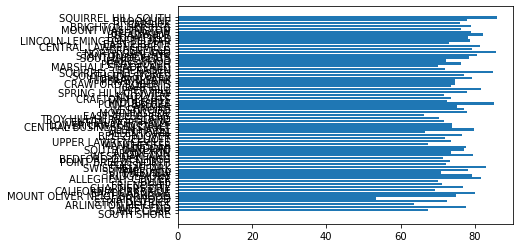

In [15]:
plt.plot.density(deaths['NEIGHBORHOOD'], deaths['TOTAL MD AGE AT DEATH'])



# Analysis

According to this bar chart, it can be seen that Fairywood has the lowest median death value, with Squirrel Hill South having the largest value. To better visualize this here is a map displaying the density of deaths in each neighborhood.

In [21]:
deaths = pd.read_csv("deaths.tsv", sep="\t")
deaths = deaths.dropna()
deaths = deaths.drop(deaths.index[0])
med_deaths = deaths.groupby("NEIGHBORHOOD").sum()['TOTAL MD AGE AT DEATH']
med_deaths.sort_values(ascending = True)



NEIGHBORHOOD
FAIRYWOOD              53.3
ARLINGTON HEIGHTS      63.7
EAST ALLEGHENY         66.2
ALLENTOWN              66.5
MANCHESTER             67.4
                       ... 
SWISSHELM PARK         83.1
SQUIRREL HILL NORTH    85.0
POINT BREEZE           85.1
NORTH OAKLAND          85.6
SQUIRREL HILL SOUTH    85.9
Name: TOTAL MD AGE AT DEATH, Length: 68, dtype: float64

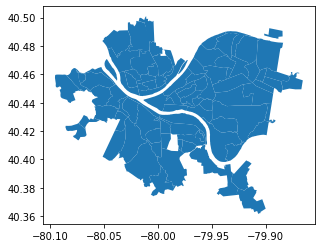

In [17]:
neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp")
neighborhoods.plot()

In [22]:
death_map = neighborhoods.merge(med_death, how='left', left_on = 'hood', right_on = 'NEIGHBORHOOD')
death_map[['hood','TOTAL MD AGE AT DEATH', 'geometry']].head()





,hood,TOTAL MD AGE AT DEATH,geometry
0,Central Oakland,NaN,"POLYGON ((-79.95304 40.44203, -79.95302 40.442..."
1,North Oakland,NaN,"POLYGON ((-79.95455 40.45882, -79.95427 40.458..."
2,West Oakland,NaN,"POLYGON ((-79.96230 40.44294, -79.96220 40.442..."
3,Crawford-Roberts,NaN,"POLYGON ((-79.98275 40.44641, -79.98273 40.446..."
4,Strip District,NaN,"POLYGON ((-79.97494 40.45629, -79.97484 40.456..."


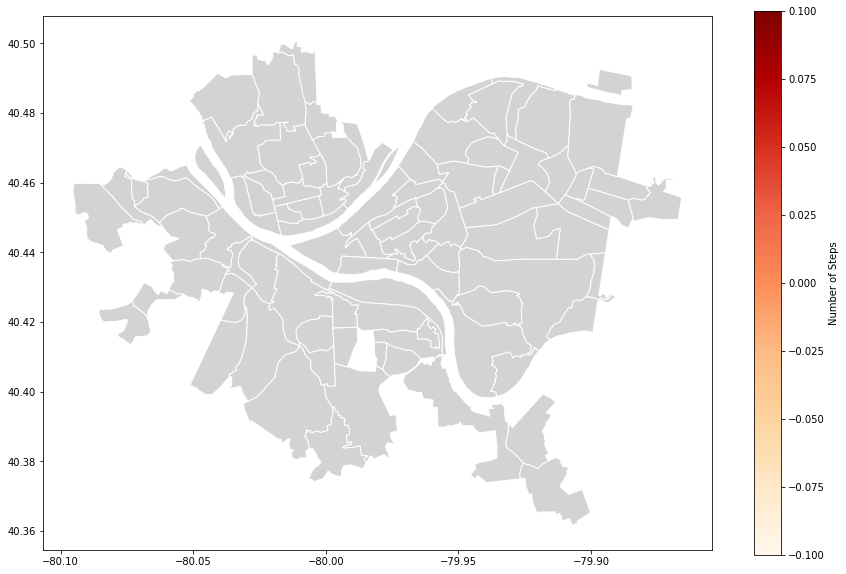

In [28]:
death_map.plot(column='TOTAL MD AGE AT DEATH', # set the data to be used for coloring
               cmap='OrRd',              # choose a color palette
               edgecolor="white",        # outline the districts in white
               legend=True,              # show the legend
               legend_kwds={'label': "Number of Steps"}, # label the legend
               figsize=(15, 10),         # set the size
               missing_kwds={"color": "lightgrey"} # set disctricts with no data to gray
               )